In [ ]:
# Project done on May 2022
import pandas as pd

In [ ]:
# press ctrl and click on below link
# https://www.kaggle.com/d4rklucif3r/restaurant-reviews
# Kindly download the tsv file and upload it here
df = pd.read_csv("/content/Restaurant_Reviews.tsv", delimiter = "\t")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
df = df.replace([1, 0], ["Positive", "Negative"])

In [ ]:
df["Liked"].value_counts()

Positive    500
Negative    500
Name: Liked, dtype: int64

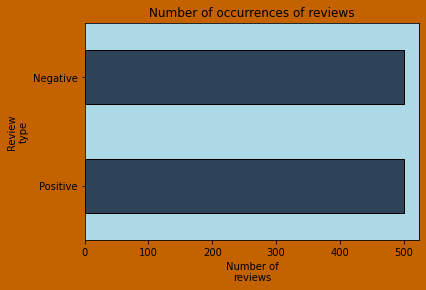

In [ ]:
plt.figure(facecolor = "#C46200")
plt.axes().set_facecolor("lightblue")
plt.title("Number of occurrences of reviews")
plt.xlabel("Number of\nreviews")
plt.ylabel("Review\ntype")
df["Liked"].value_counts().plot(kind = "barh", color = "#2F435A", edgecolor = "black")
plt.show()

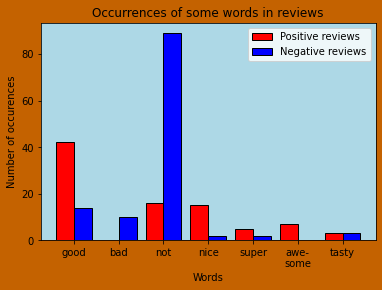

In [ ]:
negative = df.loc[df["Liked"] == "Negative"]
positive = df.loc[df["Liked"] == "Positive"]

# The spaces at start and end are to assure they are individual words only not parts of
# bigger words
positive_word_occurrences = [np.array(positive["Review"]).sum().lower().count(" good "),
                             np.array(positive["Review"]).sum().lower().count(" bad "),
                             np.array(positive["Review"]).sum().lower().count(" not "),
                             np.array(positive["Review"]).sum().lower().count(" nice "),
                             np.array(positive["Review"]).sum().lower().count(" super "),
                             np.array(positive["Review"]).sum().lower().count(" awesome "),
                             np.array(positive["Review"]).sum().lower().count(" tasty ")]
negative_word_occurrences = [np.array(negative["Review"]).sum().lower().count(" good "),
                             np.array(negative["Review"]).sum().lower().count(" bad "),
                             np.array(negative["Review"]).sum().lower().count(" not "),
                             np.array(negative["Review"]).sum().lower().count(" nice "),
                             np.array(negative["Review"]).sum().lower().count(" super "),
                             np.array(negative["Review"]).sum().lower().count(" awesome "),
                             np.array(negative["Review"]).sum().lower().count(" tasty ")]
words = ["good", "bad", "not", "nice", "super", "awesome", "tasty"]
x = np.linspace(5, 35, 7)
plt.figure(facecolor = "#C46200")
plt.axes().set_facecolor("lightblue")
plt.title("Occurrences of some words in reviews")
plt.bar(x - 1, positive_word_occurrences, width = 2, color = "red", edgecolor = "black")
plt.bar(x + 1, negative_word_occurrences, width = 2, color = "blue", edgecolor = "black")
plt.xticks(x, words)
plt.xlabel("Words")
plt.ylabel("Number of occurences")
plt.legend(["Positive reviews", "Negative reviews"])
plt.show()

In [ ]:
x = df["Review"].values
y = df["Liked"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 1940, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = "english")
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(x_train_vect, y_train)
y_pred1 = model_SVC.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_SVC = accuracy_score(y_test, y_pred1)
accuracy_SVC

0.856

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline_model_SVC = make_pipeline(CountVectorizer(),SVC())
pipeline_model_SVC.fit(x_train,y_train)
y_pred2 = pipeline_model_SVC.predict(x_test)

In [ ]:
pipeline_accuracy_SVC = accuracy_score(y_test, y_pred2)
pipeline_accuracy_SVC

0.756

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(x_train_vect, y_train)
y_pred3 = model_NB.predict(x_test_vect)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred3)
accuracy_NB

0.784

In [ ]:
pipeline_model_NB = make_pipeline(CountVectorizer(), MultinomialNB())
pipeline_model_NB.fit(x_train, y_train)
y_pred4 = pipeline_model_NB.predict(x_test)

In [ ]:
pipeline_accuracy_NB = accuracy_score(y_test, y_pred4)
pipeline_accuracy_NB

0.808

In [ ]:
print(f"In this case, accuracy scores are in order as follows\n\
\t SVC model accuracy \t:\t{accuracy_SVC}\n\
Pipeline SVC model accuracy \t:\t{pipeline_accuracy_SVC}\n\
\t  NB model accuracy \t:\t{accuracy_NB}\n\
 Pipeline NB model accuracy \t:\t{pipeline_accuracy_NB}\n\n\
Thus SVC model has highest accuracy of {accuracy_SVC}")

In this case, accuracy scores are in order as follows
	 SVC model accuracy 	:	0.856
Pipeline SVC model accuracy 	:	0.756
	  NB model accuracy 	:	0.784
 Pipeline NB model accuracy 	:	0.808

Thus SVC model has highest accuracy of 0.856


In [ ]:
import joblib
joblib.dump(model_SVC, "Sentiment_analysis")

['Sentiment_analysis']

In [ ]:
model = joblib.load("Sentiment_analysis")

In [ ]:
model.predict(vect.transform(["food could have been better"]))

array(['Negative'], dtype=object)

In [ ]:
model.predict(vect.transform(["food here tastes awesome"]))

array(['Positive'], dtype=object)

In [ ]:
# Predict sentiment of your input
model.predict(vect.transform([input("Enter review: ")]))[0]

Enter review: This is the best food i have eaten in a while


'Positive'